<a href="https://colab.research.google.com/github/Rahulgathreyas/ML_WorkShop/blob/main/ObjectDection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from cv2 import imshow as cv2_imshow


In [ ]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [8]:
ig = Image.open("/content/dection.jpg")

In [9]:
#covert the img to Tensor format to used it to the model
transform=T.ToTensor()
img=transform(ig)
#img holds the tensor values where as ig is an image

In [10]:
##it means we don't use any gradiant functions
with torch.no_grad():
    pred=model([img])

In [11]:
#covert the img to Tensor format to used it to the model
transform=T.ToTensor()
img=transform(ig)
#img holds the tensor values where as ig is an image

In [12]:
pred[0].keys()


dict_keys(['boxes', 'labels', 'scores'])

In [13]:
#Seperate 3 different keys
bboxes,labels,scores=pred[0]["boxes"],pred[0]["labels"],pred[0]["scores"]
bboxes

tensor([[ 67.0314,  81.3599,  87.0870, 104.4363],
        [280.9731,  92.1291, 304.2316, 119.0229],
        [206.8377,  88.7284, 218.8248, 112.5154],
        [144.0493,  42.7194, 151.9015,  53.0488],
        [213.3771,  61.7604, 219.8945,  91.6471],
        [141.4743,  94.9233, 162.7689, 125.0703],
        [152.2770,  46.7609, 157.7660,  53.6386],
        [161.5270,  91.0715, 291.1717, 141.5588],
        [  8.4567,  40.0294,  26.3058,  61.1633],
        [201.4300,  80.7180, 213.7799,  99.3904],
        [207.2591,  68.0497, 221.1501, 110.4919],
        [280.8574,  91.2704, 304.9771, 118.8409],
        [ 69.6944,  96.4574,  77.4017, 105.1989],
        [206.9973,  85.9137, 218.2728, 113.4742],
        [ 79.3365,  95.9620,  83.7223, 102.5356],
        [233.3419,  87.5273, 306.4814, 121.4108],
        [211.8801,  65.9781, 221.6995, 101.4525],
        [289.0235,  90.5527, 304.3359,  95.3094],
        [328.9563,  65.7494, 337.0000, 105.4144],
        [ 68.0767,  86.5214,  79.2183, 104.9969],


In [14]:
#Get the top 5 presections
num=torch.argwhere(scores>0.8729).shape[0]
num

3

In [15]:
#Get the labels
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [16]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [18]:
igg=cv2.imread("/content/dection.jpg")
for i in range(num):
    x1,y1,x2,y2=bboxes[i].numpy().astype("int")
    class_name=coco_names[labels.numpy()[i]-1]
    igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    igg=cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)


In [19]:
print(igg.shape)  # Should print the image shape
print(igg.dtype)  # Should print the data type


(150, 337, 3)
uint8


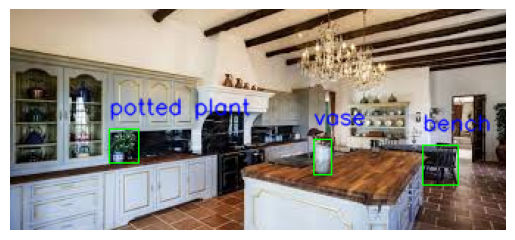

In [20]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optionally, turn off the axis
plt.show()
